In [1]:
# Import data
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

FLAGS = None

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7ff33e07a668>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7ff2fe862320>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7ff2fe862390>)

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


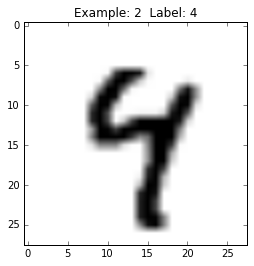

In [3]:
x_train = mnist.train.images[:,:]
y_train = mnist.train.labels[:,:]
    
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    #print(image)
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_digit(2)

In [4]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Define loss and optimizer

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
learning_rate = 0.5

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
sess = tf.InteractiveSession()

In [5]:
# Train
tf.global_variables_initializer().run()
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accO = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print(accO)


0.906


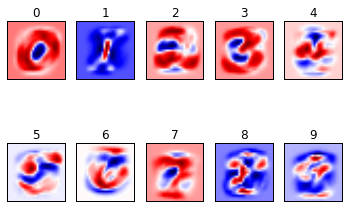

In [6]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

plt.show()

Aplicar el clasificador a un dato

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


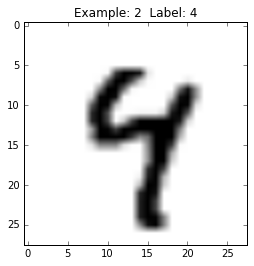

In [7]:
observacion_a_revisar = 2

display_digit(observacion_a_revisar)

In [8]:
answer = sess.run(y, feed_dict={x: x_train[observacion_a_revisar].reshape(1,784)})
print(answer)

[[  2.30258979e-06   2.94928299e-07   4.04340085e-07   6.42001163e-04
    2.16875955e-01   6.06903667e-03   4.51102424e-05   4.75811801e-04
    2.05823276e-02   7.55306780e-01]]


In [9]:
answer.argmax()

9

### Nuevo modelo con capa oculta de 10 neuronas:

===========================Capa oculta 5  neuronas===========================
Exactitud de entrenamiento:  0.779491
Exactitud de validación:  0.7746
===========================Capa oculta 10  neuronas===========================
Exactitud de entrenamiento:  0.861055
Exactitud de validación:  0.8686
===========================Capa oculta 15  neuronas===========================
Exactitud de entrenamiento:  0.883855
Exactitud de validación:  0.882
===========================Capa oculta 20  neuronas===========================
Exactitud de entrenamiento:  0.890145
Exactitud de validación:  0.8916
===========================Capa oculta 25  neuronas===========================
Exactitud de entrenamiento:  0.893309
Exactitud de validación:  0.8952
===========================Capa oculta 30  neuronas===========================
Exactitud de entrenamiento:  0.896364
Exactitud de validación:  0.8956
===========================Capa oculta 40  neuronas===========================
Exactitud de entrenamie

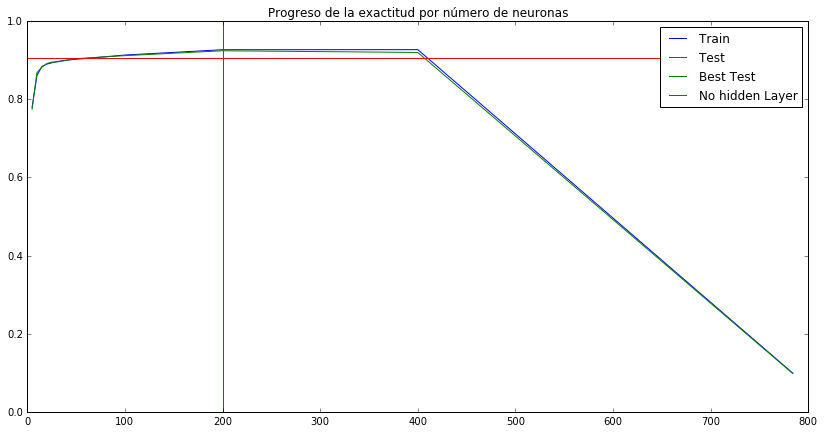

In [10]:
# Create the model
input_size=784
output_size=10

neuronas = [5,10,15,20,25,30,40,50,100,200,400,784]
nNeuronas = len(neuronas)
accG = np.zeros((nNeuronas,2))
i = 0
for hiden_size in neuronas:

    #La variables para lo que se va a ir calculando y modificando en el camino
    weights = {
        'w_h': tf.Variable(tf.random_uniform([input_size, hiden_size], -1, 1)),
        'w_out': tf.Variable(tf.random_uniform([hiden_size, output_size], -1, 1))
    }
    biases = {
        'b_h': tf.Variable(tf.zeros([hiden_size])),
        'b_out': tf.Variable(tf.zeros([output_size]))
    }

    #Modelo, grafo:
    # Capa oculta completamente conectada:
    hlayer = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['w_h']), biases['b_h']))
    # Salida completamente conectada (una salida)
    y = tf.nn.softmax(tf.add(tf.matmul(hlayer, weights['w_out']), biases['b_out']))

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
    #cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
    learning_rate = 0.5
    #Define Optimizer
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

    # Train
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for _ in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    # Test trained model
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accTrain = sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels})
    accTest = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    print("===========================Capa oculta",hiden_size," neuronas===========================")
    print("Exactitud de entrenamiento: ",accTrain)
    print("Exactitud de validación: ",accTest)
    accG[i] = [accTrain,accTest]
    i = i + 1

    #Graficaaaaaas
plt.figure(figsize=(14,7))
plt.plot(neuronas, accG[:,0])
plt.plot(neuronas, accG[:,1])
aux = np.argmax(accG[:,1])
plt.plot([neuronas[aux],neuronas[aux]],[0,1], color="green")
plt.plot([0,max(neuronas)],[accO,accO],color="red")
plt.title("Progreso de la exactitud por número de neuronas")
plt.legend(["Train","Test","Best Test","No hidden Layer"])
plt.show()

### Conclusiones:
* El modelo sin capa oculta tiene una exactitud del 90.6%. Se puede apreciar que al poner capa oculta puede (o no) mejorar el desempeño del modelo.
* Con una capa oculta de 10 neuronas no aumenta el desempeño, de hecho disminuye. Se puede apreciar en la gráfica cómo entre 100 y 400 neuronas el desempeño es mejor que si no se implementa una capa oculta. 
* El mejor desempeño se encuentra en 200 neuronas con una exactitud del 92.43% en el set de validación.
